In [153]:
import pandas as pd
import numpy as np

df = pd.read_csv('weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [154]:
df = df.drop(df.iloc[:,:1],axis='columns')

In [155]:
df.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [156]:
X = df[['Height']]
X

,Height
0,73.847017
1,68.781904
2,74.110105
3,71.730978
4,69.881796
...,...
9995,66.172652
9996,67.067155
9997,63.867992
9998,69.034243


In [157]:
y = df.Weight
y

0       241.893563
1       162.310473
2       212.740856
3       220.042470
4       206.349801
           ...    
9995    136.777454
9996    170.867906
9997    128.475319
9998    163.852461
9999    113.649103
Name: Weight, Length: 10000, dtype: float64

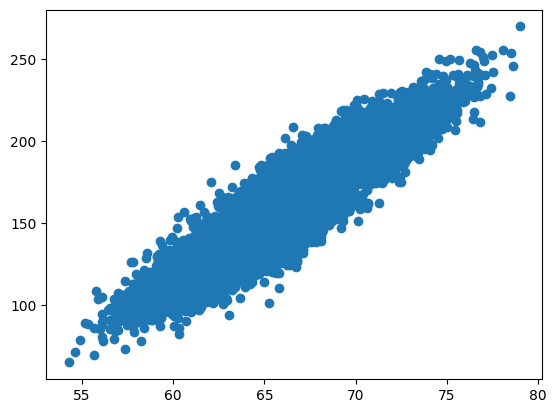

In [158]:
import matplotlib.pyplot as plt

plt.scatter(X,y)

In [159]:
class LinearRegression:
    def __init__(self,lr=0.00005,n_iters=10000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self,X,y):
        n_samples,n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        for _ in range(self.n_iters):
            y_pred = np.dot(X, self.weights) + self.bias

            dw = (1/n_samples) * np.dot(X.T, (y_pred-y))
            db = (1/n_samples) * np.sum(y_pred-y)

            self.weights = self.weights - self.lr * dw
            print(self.weights)
            self.bias = self.bias - self.lr * db

    def predict(self,X):
        y_pred = np.dot(X,self.weights) + self.bias
        return y_pred

In [160]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

model = LinearRegression()
model.fit(X_train,y_train)
print(y_train,y_test)

[0.54055686]
[0.96170849]
[1.28983071]
[1.54547311]
[1.74464599]
[1.89982309]
[2.0207228]
[2.11491676]
[2.18830409]
[2.24548084]
[2.29002782]
[2.32473486]
[2.35177554]
[2.37284331]
[2.38925754]
[2.40204617]
[2.41201007]
[2.41977321]
[2.42582171]
[2.43053434]
[2.43420617]
[2.43706711]
[2.43929628]
[2.44103324]
[2.44238671]
[2.4434414]
[2.44426331]
[2.44490386]
[2.44540311]
[2.44579227]
[2.44609567]
[2.44633224]
[2.44651675]
[2.44666069]
[2.44677303]
[2.44686075]
[2.44692929]
[2.44698288]
[2.44702483]
[2.44705771]
[2.44708352]
[2.44710382]
[2.44711983]
[2.4471325]
[2.44714256]
[2.44715059]
[2.44715705]
[2.44716227]
[2.44716653]
[2.44717005]
[2.44717298]
[2.44717546]
[2.44717759]
[2.44717944]
[2.44718107]
[2.44718254]
[2.44718388]
[2.44718511]
[2.44718627]
[2.44718737]
[2.44718841]
[2.44718942]
[2.44719041]
[2.44719136]
[2.4471923]
[2.44719323]
[2.44719415]
[2.44719505]
[2.44719596]
[2.44719685]
[2.44719774]
[2.44719863]
[2.44719952]
[2.44720041]
[2.44720129]
[2.44720217]
[2.44720305]
[2.

In [161]:
y_pred = model.predict(X_test)

def mse(y_test,y_pred):
    return np.mean((y_test-y_pred)**2)

mse = mse(y_test,y_pred)
print(mse)

568.8454093650574


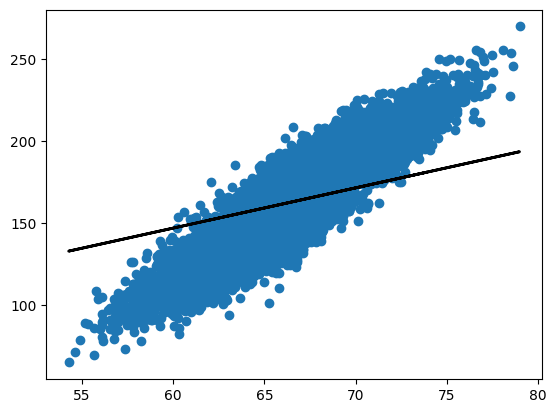

In [162]:
y_pred_line = model.predict(X)
plt.scatter(X,y)
plt.plot(X, y_pred_line, color='black', linewidth=2, label='Prediction')
plt.show()